# PowerCo. Customers' Churn

<span style="font-size: 20px;"> __PowerCo's Need__  </span>

<span style="font-size: 20px;"> __Objective:__ </span>

<span style="font-size: 18px;">To identify the factors contributing to customer churn at PowerCo and develop predictive models to proactively address and reduce churn rates.</span>

<span style="font-size: 20px;"> __Background:__ </span>

<span style="font-size: 18px;"> __PowerCo__, a leading provider in the power industry, has observed a significant number of customers discontinuing their services. Understanding the reasons behind customer churn is crucial for maintaining a stable customer base and ensuring long-term growth.</span>

<span style="font-size: 20px;"> __Expected Outcomes:__ </span>

<span style="font-size: 18px;"> 
- A comprehensive understanding of the drivers of customer churn at PowerCo.<br>
- Predictive models that can accurately identify at-risk customers.<br>
- Strategic recommendations to enhance customer retention and reduce churn rates.</span>

## Directory, libararies and data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Adjusting columns size and width

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Adjust display width

In [3]:
# Load data

In [4]:
# Google Drive file ID
client_file_id = '1ZqaMfoOePU6CN5XK7Y900nhMJYeNhYdc'
price_file_id = '1HM9FB-jaGS2OSBr1SHKojo-sk77S0xdZ' 
# Construct the direct download URL
client_url = f'https://drive.google.com/uc?export=download&id={client_file_id}'
price_url = f'https://drive.google.com/uc?export=download&id={price_file_id}'

In [7]:
# Read the url into a DataFrame
client_df = pd.read_csv(client_url, engine='python')
price_df = pd.read_csv(price_url, engine='python')

## EDA and Cleaning
---

__Checking the first 5 rows of the data to have an understanding of the dataframes. Descriptive statistics is also carried out.__

### client_df eda

In [8]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [9]:
print ("The number of rows are:", client_df.shape[0])
print ("The number of columns are:", client_df.shape[1])

The number of rows are: 14606
The number of columns are: 26


In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [13]:
client_df[client_df.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [14]:
print(f'Features: {client_df.columns.tolist()}')
print(f'Missing Values: {client_df.isnull().values.sum()}')
print(f'Unique Values: \n\n{client_df.nunique()}')

Features: ['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']
Missing Values: 0
Unique Values: 

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12


In [43]:
# Check the number of unique values (levels) and their counts in each categorical variable
# Function to return categorical columns with value counts less than a specified number
def filter_categorical_columns(df, threshold):
    categorical_columns = df.select_dtypes(include=['object', 'category', 'number'])
    result = []
    for col in categorical_columns:
        if df[col].nunique() <= threshold:
            result.append(col)
    return result

In [45]:
threshold = 13
client_cat_col = filter_categorical_columns(client_df, threshold)
client_cat_col

['channel_sales',
 'forecast_discount_energy',
 'has_gas',
 'nb_prod_act',
 'num_years_antig',
 'origin_up',
 'churn']

In [46]:
# Check the number of unique values (levels) and their counts in each categorical variable
for col in client_cat_col:
    print(f"\n{client_df[col].value_counts()}")


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

forecast_discount_energy
0.0     14094
30.0      260
28.0      102
24.0       83
22.0       47
25.0        7
26.0        5
19.0        2
17.0        2
23.0        2
10.0        1
5.0         1
Name: count, dtype: int64

has_gas
f    11955
t     2651
Name: count, dtype: int64

nb_prod_act
1     11431
2      2445
3       523
4       150
5        31
9        11
6         8
8         4
10        2
32        1
Name: count, dtype: int64

num_years_antig
6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: count, dtype: int64

origin_u

### price_df eda

In [21]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [22]:
print ("The number of rows are:", price_df.shape[0])
print ("The number of columns are:", price_df.shape[1])

The number of rows are: 193002
The number of columns are: 8


In [23]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [24]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [25]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [26]:
price_df[price_df.duplicated()]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


In [27]:
print(f'Features: {price_df.columns.tolist()}')
print(f'Missing Values: {price_df.isnull().values.sum()}')
print(f'Unique Values: \n\n{price_df.nunique()}')

Features: ['id', 'price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
Missing Values: 0
Unique Values: 

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64


In [28]:
# Check the number of unique values (levels) and their counts in each categorical variable
price_categorical_columns = ['price_date']
for col in price_categorical_columns:
    print(f"\n{price_df[col].value_counts()}")


price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64


__Dates have roughly equal numbers of client ids__


## Data visualization
---

In [29]:
# Plotting stacked bars with annotations
  
import matplotlib.pyplot as plt

def plot_stacked_bars(dataframe, title, size=(18, 10), rotation=0, legend_position="upper right"):
    """
    Plots stacked bar charts with annotations.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data to plot.
    title_ (str): Title of the plot.
    size_ (tuple): Size of the plot (width, height). Default is (18, 10).
    rot_ (int): Rotation angle of the x-axis labels. Default is 0.
    legend_ (str): Location of the legend. Default is "upper right".

    Returns:
    None
    """
    # Create a stacked bar plot
    fig,ax = plt.subplots(figsize = size)
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        rot=rotation
    )
    ax.set_title(title)
    ax.set_ylabel("Company base (%)")

    # Annotate bars with values
    annotate_stacked_bars(ax, textsize=14)
    
    # Set legend labels and location
    plt.legend(["Retention", "Churn"], loc=legend_position)
    
    # Display the plot
    plt.show()

def annotate_stacked_bars(ax, pad = 0.99, color = 'white', textsize=14):
    """
    Annotates the bars in a stacked bar plot with their respective values.

    Parameters:
    ax (matplotlib.axes.Axes): Axes object of the plot to annotate.
    pad (float, optional): Annotation padding. Defaults to 0.99.
    color (str, optional): Annotation color. Defaults to "white"
    textsize (int): Font size of the annotations. Default is 14.

    Returns:
    None
    """
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy() 
        if height > 0:
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}', 
                    ha='center', va='center', fontsize=textsize, color='white')

# Function to plot distribution
def plot_distribution(dataframe, column, ax, bins=50):
    """
    Plot the distribution of a variable in a stacked histogram for churned or retained companies.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    column (str): The column name to plot the distribution for.
    ax (matplotlib.axes.Axes): Axes object to plot on.
    bins_ (int): Number of bins for the histogram. Default is 50.

    Returns:
    None
    """
      # Create a temporary DataFrame with the data to be plotted
    temp_df = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],
        "Churn": dataframe[dataframe["churn"] == 1][column]
    })

    # Plot the histogram
    temp_df[["Retention", "Churn"]].plot(kind='hist', bins=bins, ax=ax, stacked=True)
    
    # Set x-axis label
    ax.set_xlabel(column)

    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [30]:
# Function to plot categorical columns in client_df by churn (the target variable)

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_cat_col_by_churn(df, columns_of_interest, xlabel, title_prefix, save_path=None):
    """
    Plots horizontal stacked bar charts showing the distribution of churned and retained users by specified columns.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns_of_interest (list): List of columns to include in the plot.
    xlabel (str): Label for the x-axis.
    title_prefix (str): Prefix for the title of the plot.
    save_path (str, optional): The path where graphs are saved.

    Returns:
    None
    """
    for column in columns_of_interest:
        # Extract relevant columns
        col = df[[column, 'churn']]

        # Calculate total and percentage of churn
        col_total = col.groupby([column, 'churn']).size().unstack(fill_value=0)
        col_percentage = (col_total.div(col_total.sum(axis=1), axis=0) * 100).reset_index()

        # Create the plot
        fig, ax = plt.subplots(figsize=(11, 10))

        # Plot the horizontal stacked bar chart
        col_total.plot(kind='barh', stacked=True, color=['#4e79a7', '#f28e2b'], edgecolor='black', ax=ax)

        # Set title and labels
        ax.set_title(f"{title_prefix} - {column} by Churn")
        ax.set_xlabel(xlabel)

        # Add value labels with percentages
        def add_value_labels_with_percent(ax, total):
            for p in ax.patches:
                width = p.get_width()
                if width > 0:
                    percentage = width / total * 100
                    ax.annotate(f'{int(width)}\n({percentage:.1f}%)',
                                (p.get_x() + width / 2., p.get_y() + p.get_height() / 2.),
                                ha='center', va='center', fontsize=10, color='black')

        # Calculate the total number of users for percentage calculation
        total_col = col_total.sum().sum()
        add_value_labels_with_percent(ax, total_col)

        # Save the plot if save_path is provided
        if save_path:
            filename = f"{save_path}/{column}_by_churn.jpg"
            plt.savefig(filename)

        # Show the plot
        plt.show()

In [52]:
def plot_all_distributions(dataframe, columns, save_path=None):
    """
    Iterates through the specified columns and applies the plot_distribution function to each column.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    columns (list): List of column names to plot.
    save_path (str, optional): The path where graphs are saved.

    Returns:
    None
    """
    num_columns = len(columns)
    fig, axs = plt.subplots(nrows=num_columns, figsize=(8, 5 * num_columns))

    if num_columns == 1:
        axs = [axs]  # Ensure axs is iterable if there's only one subplot

    for ax, column in zip(axs, columns):
        plot_distribution(dataframe, column, ax)
    
    # Save the plot
    if save_path:
            filename = f"{save_path}/{column}.jpeg"
            plt.savefig(filename)

    plt.tight_layout()
    plt.show()

### Plotting the categorical columns of client_df

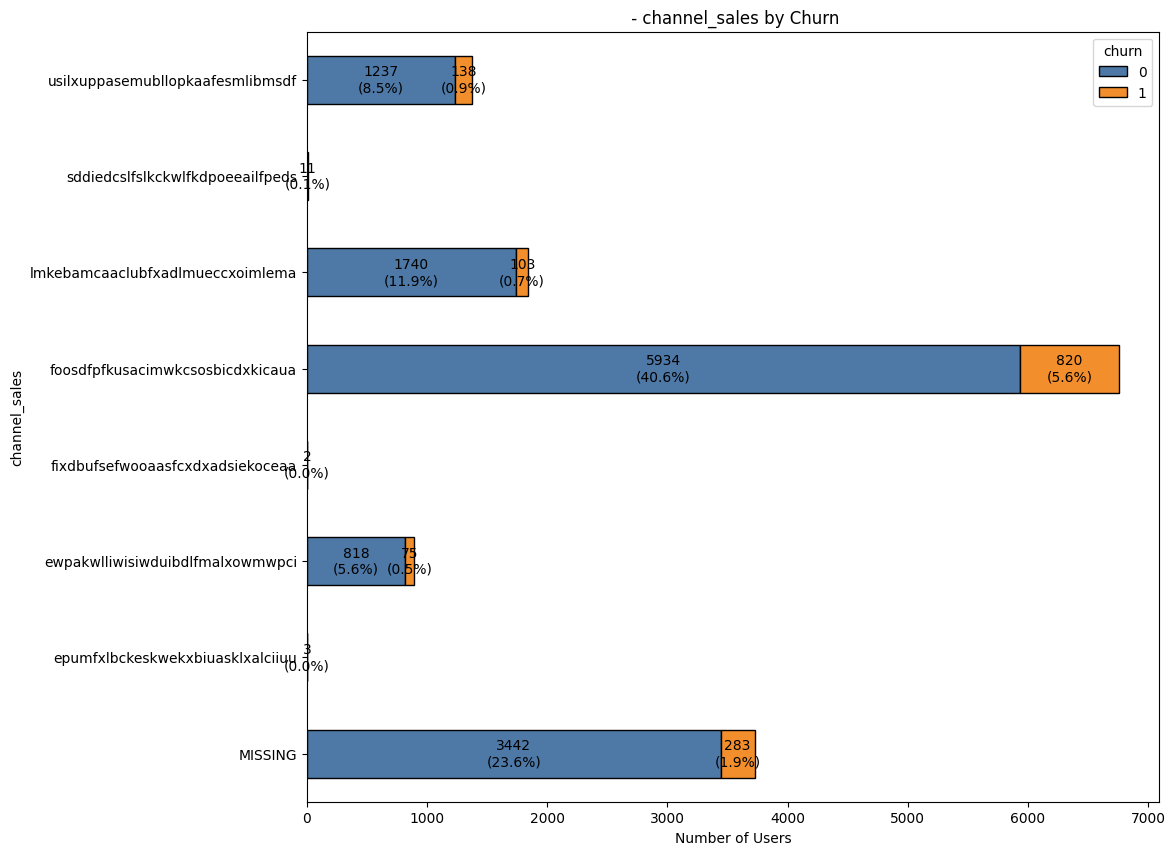

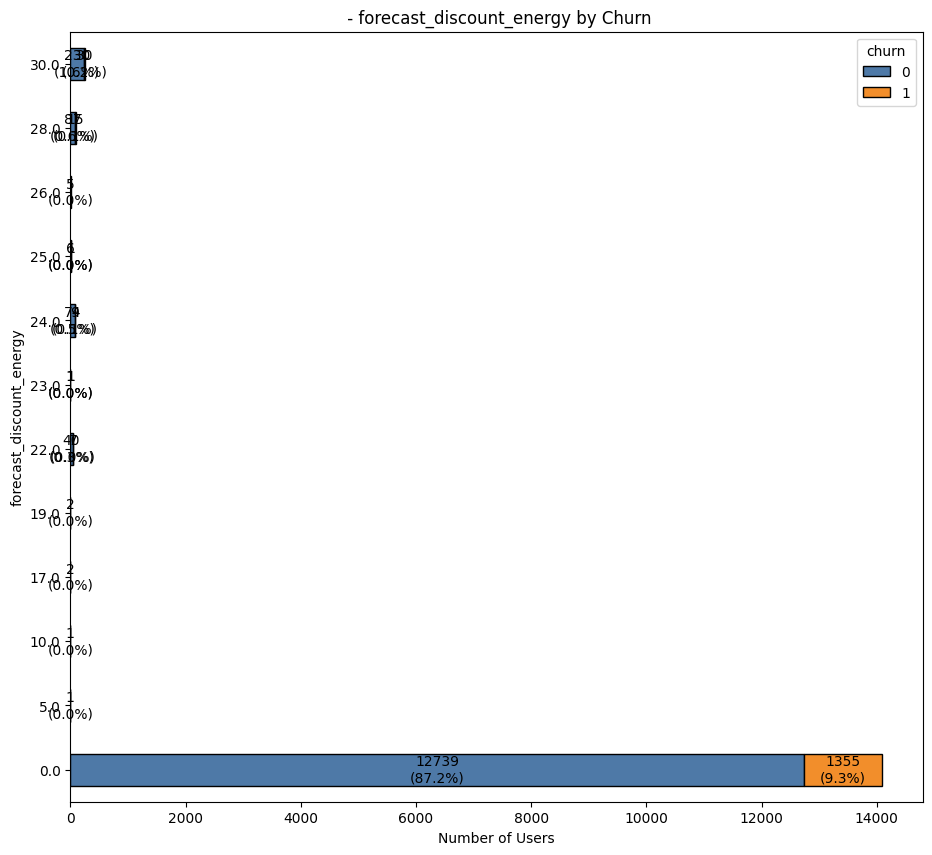

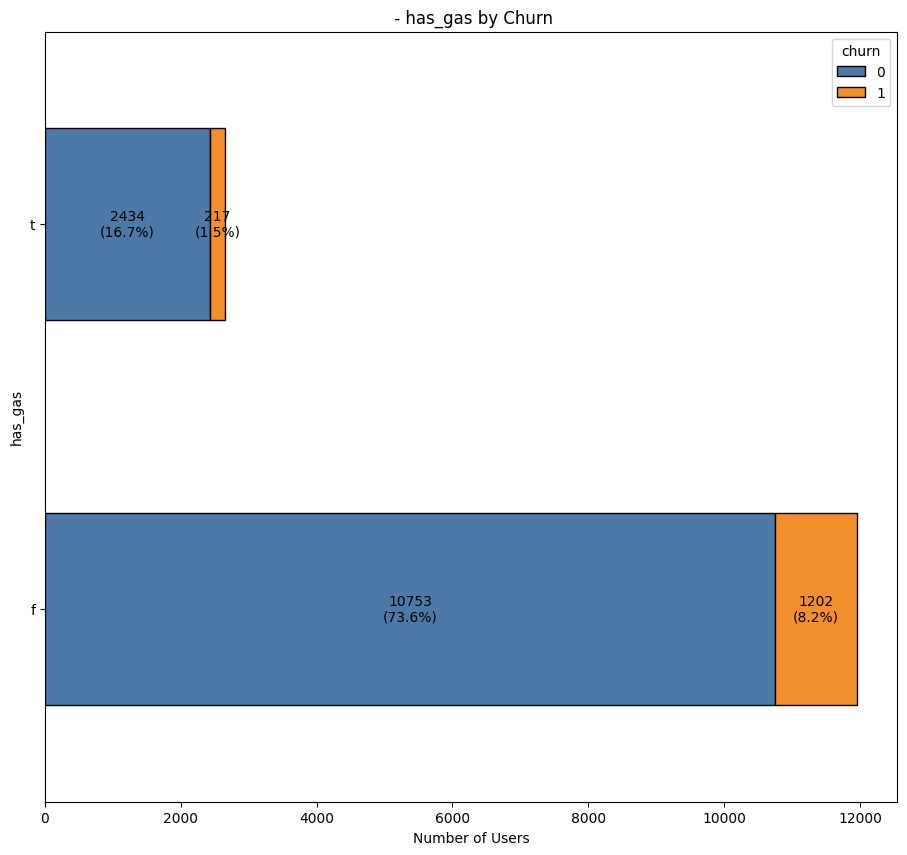

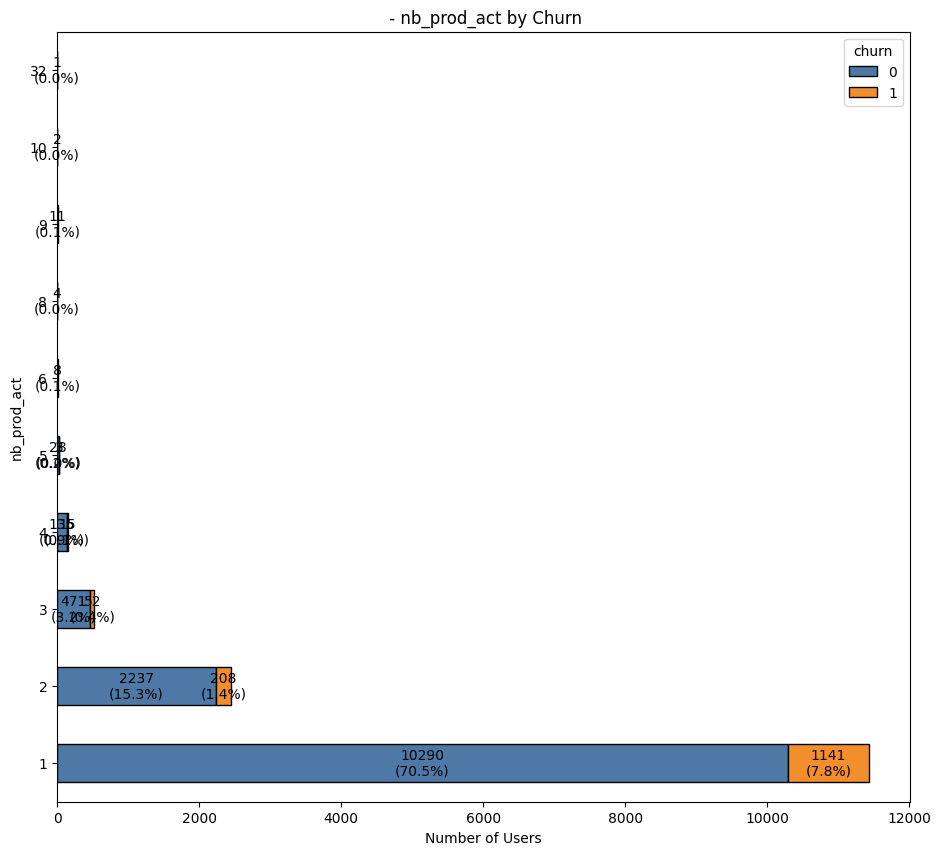

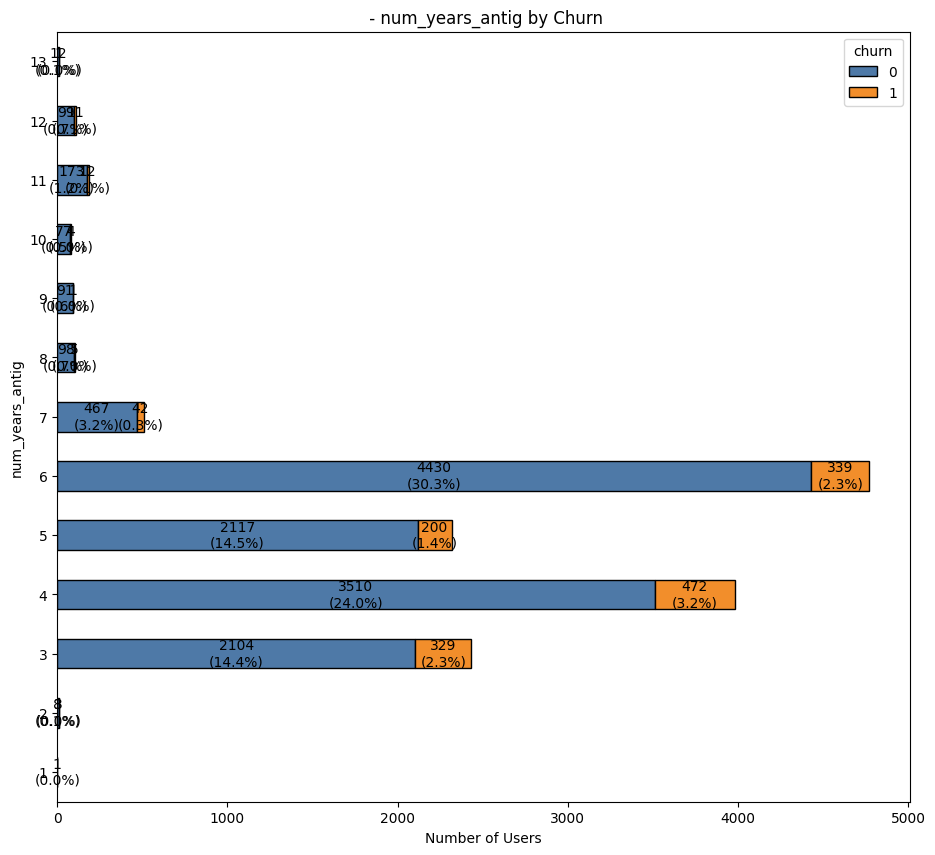

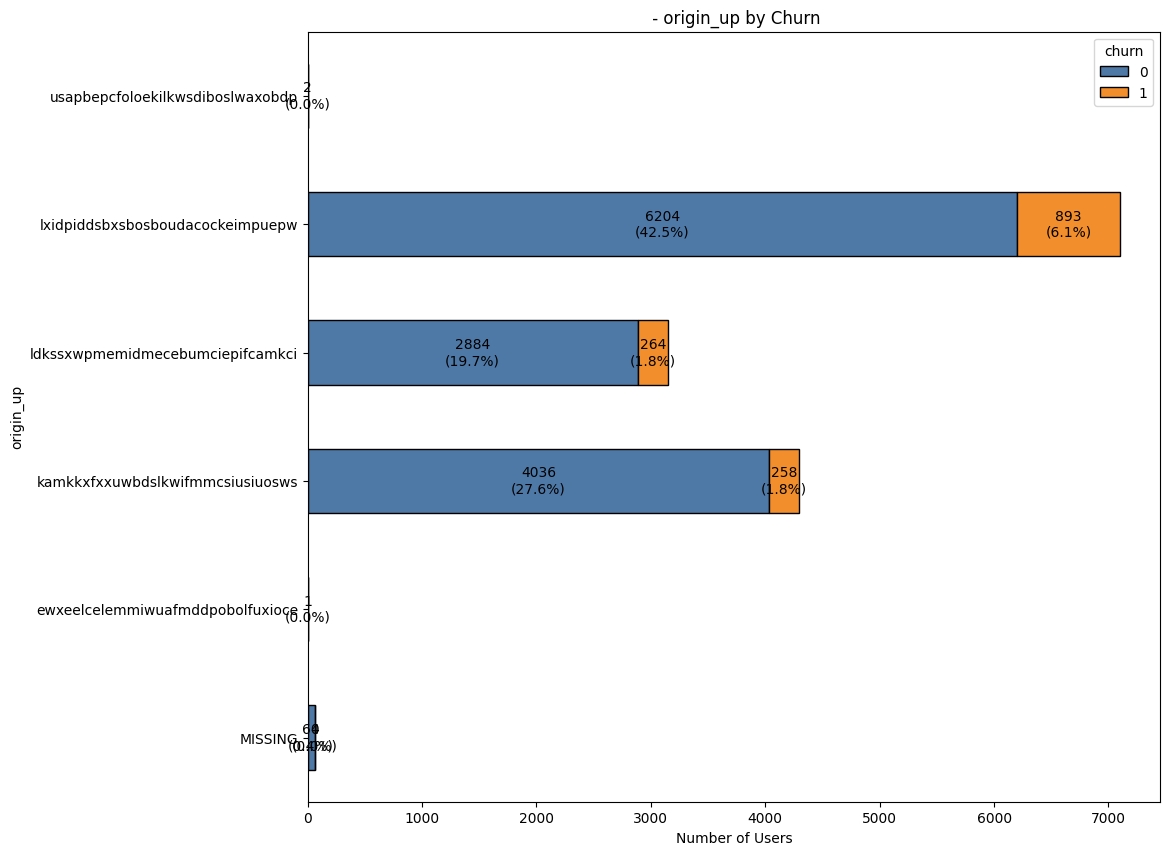

In [54]:
# client_categorical_columns graphs
client_cat_col.remove('churn')
plot_cat_col_by_churn(client_df, client_cat_col, xlabel='Number of Users', title_prefix='')

### Distribution

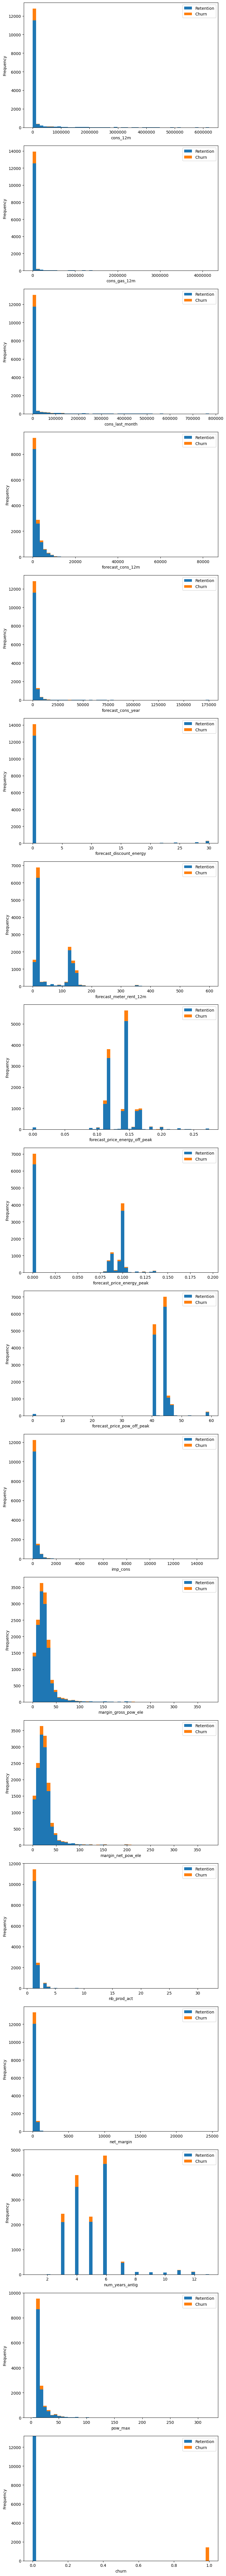

In [55]:
client_num = client_df.select_dtypes(include =(np.number))

#Plotting the distribution of numeric columns in client_df
columns_of_interest = client_num.columns.to_list()  # Add other columns of interest
plot_all_distributions(client_num, columns_of_interest)

### Stacked Bar Charts by churn

In [56]:
# Churn by client id

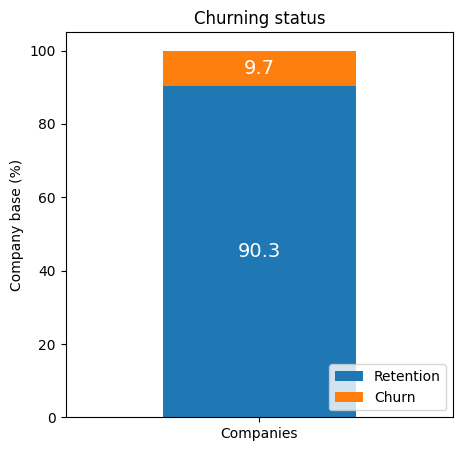

In [57]:
# Extract and rename columns for clarity
churn = client_df[['id', 'churn']].rename(columns={'id': 'Companies'})

# Calculate total and percentage of churn
churn_total = churn.groupby('churn').count()
churn_percentage = (churn_total / churn_total.sum()) * 100.0

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_position="lower right")

In [58]:
# Plotting graphs for numeric columns that relates to channel

In [59]:
client_channel = client_df[['id', 'channel_sales', 'churn']]
client_channel = client_channel.groupby([client_channel['channel_sales'], client_channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (client_channel.div(client_channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [60]:
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


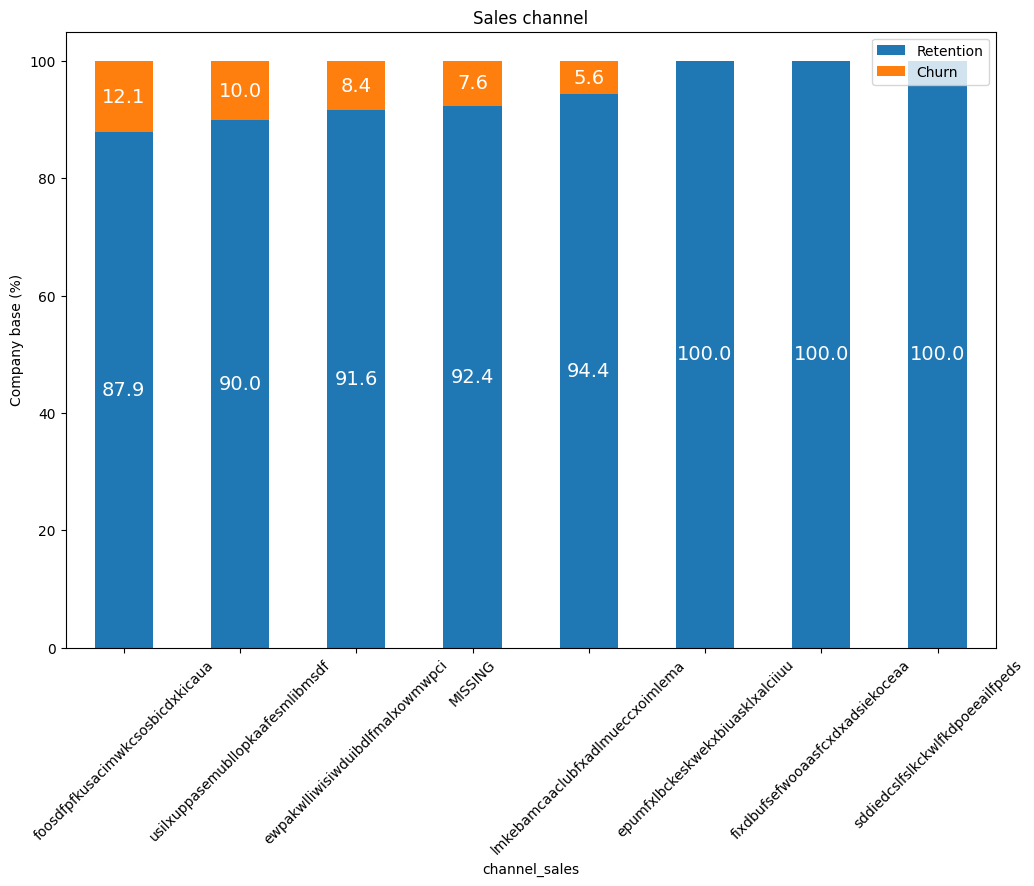

In [61]:
plot_stacked_bars(channel_churn, 'Sales channel', size=(12, 8),rotation=45)

In [62]:
# Plotting boxplots for numeric columns that relates to consumption

In [63]:
client_consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

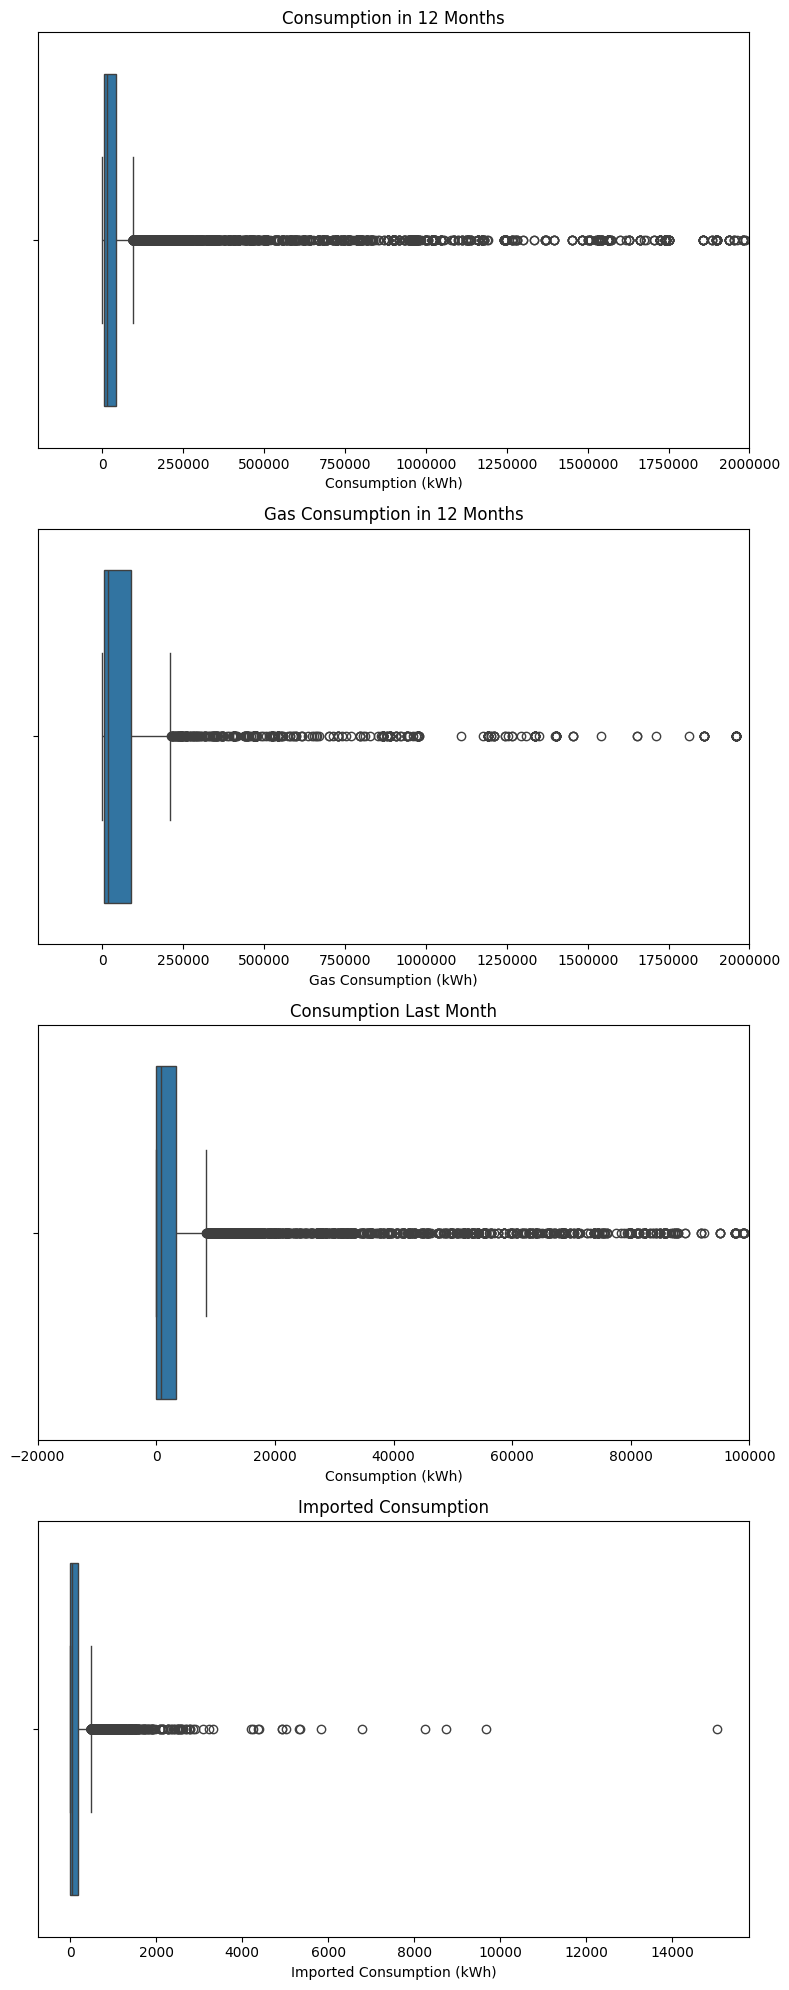

In [65]:
# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(8, 20))

# Plot boxplots
sns.boxplot(client_consumption["cons_12m"], ax=axs[0], orient= 'h')
sns.boxplot(client_consumption[client_consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1], orient= 'h')
sns.boxplot(client_consumption["cons_last_month"], ax=axs[2], orient= 'h')
sns.boxplot(client_consumption["imp_cons"], ax=axs[3], orient= 'h')

# Titles and labels
titles = ["Consumption in 12 Months", "Gas Consumption in 12 Months", "Consumption Last Month", "Imported Consumption"]
x_labels = ["Consumption (kWh)", "Gas Consumption (kWh)", "Consumption (kWh)", "Imported Consumption (kWh)"]

for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ax.set_xlabel(x_labels[i])
    ax.ticklabel_format(style='plain', axis='x')
    ax.grid(False)

# Set x-axis limits
limits = [(-200000, 2000000), (-200000, 2000000), (-20000, 100000), None]
for ax, limit in zip(axs, limits):
    if limit:
        ax.set_xlim(limit)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [66]:
# Plotting plots for numeric columns that relates to forecast

In [67]:
forecast = client_df[["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]]

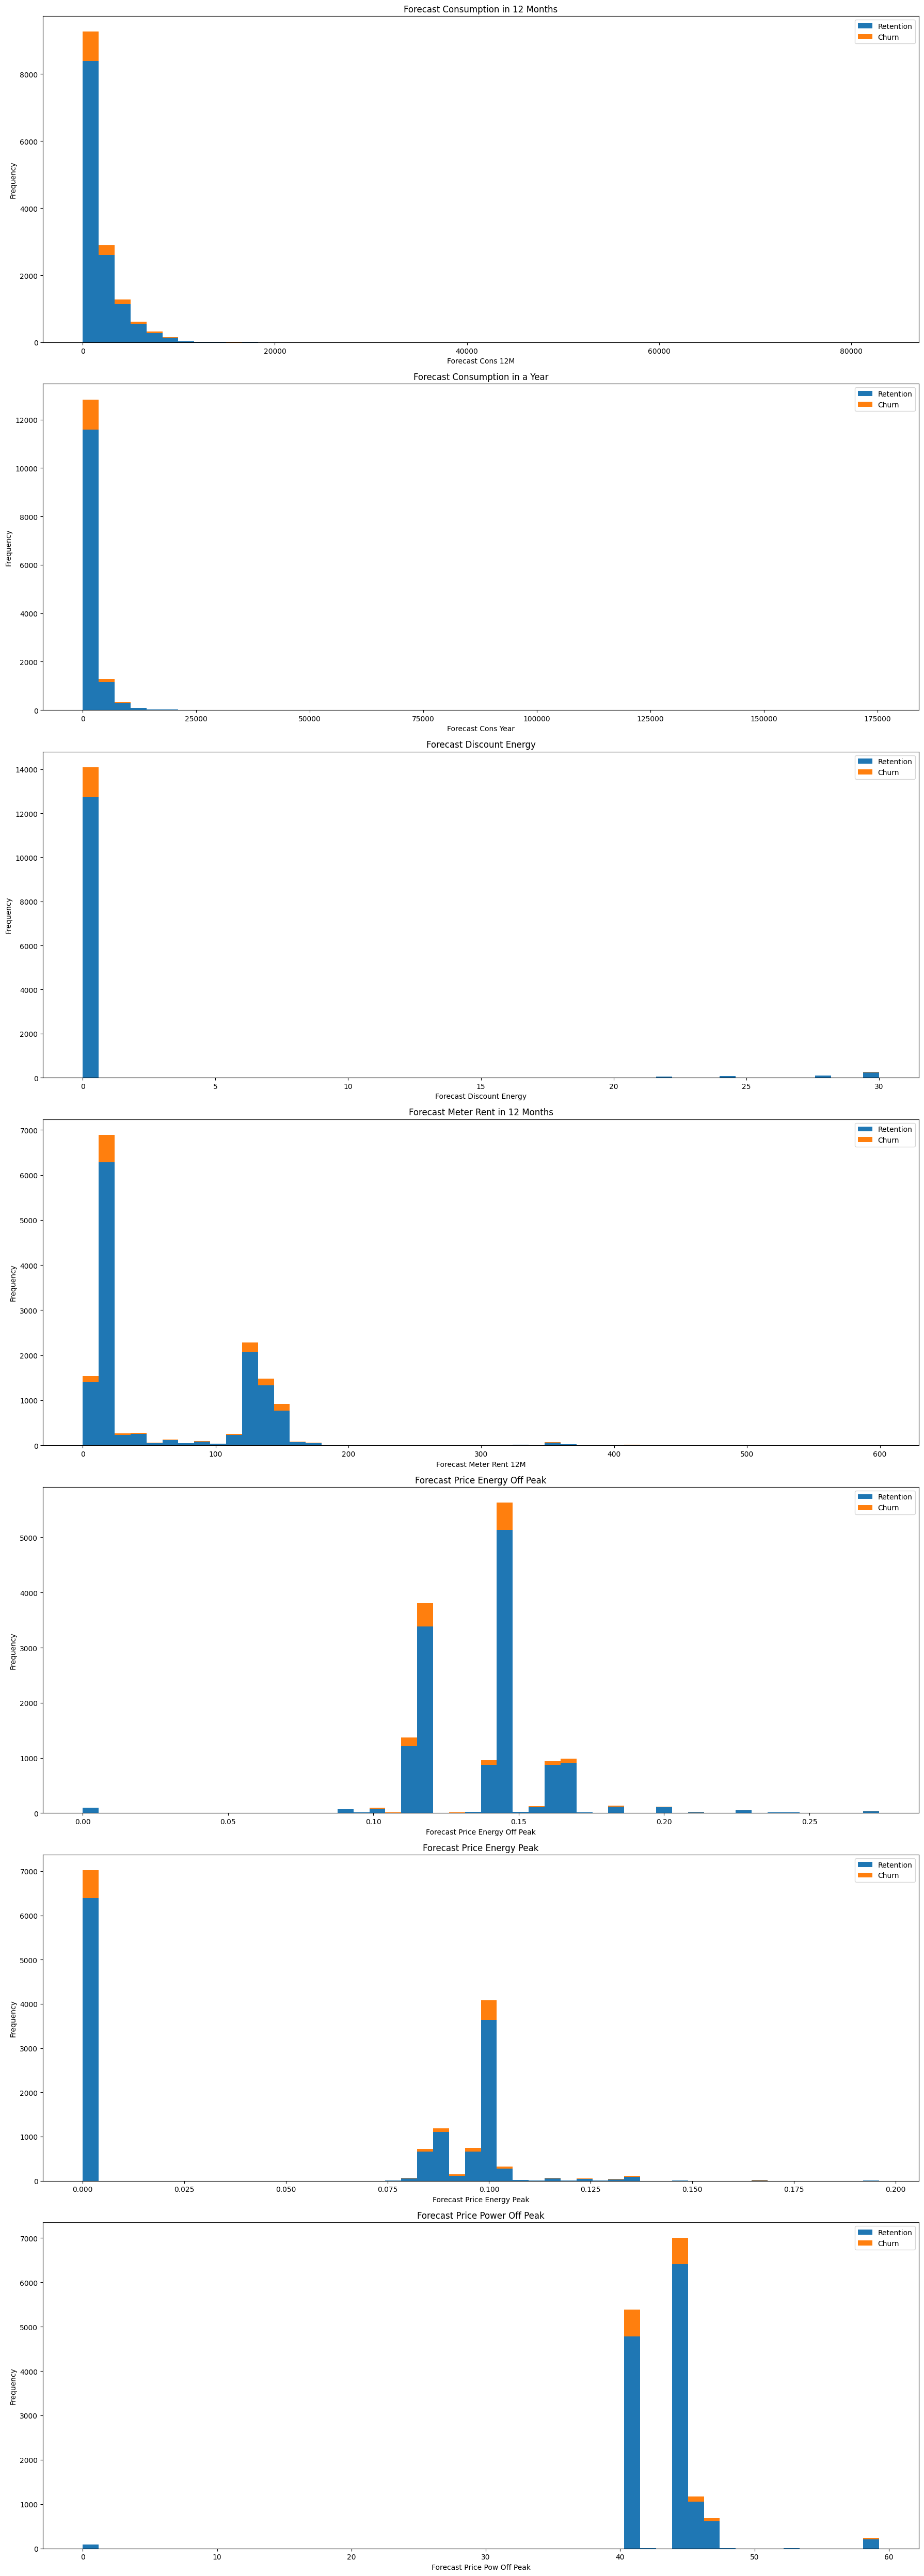

In [68]:
# Create subplots
fig, axs = plt.subplots(nrows=7, figsize=(18, 50))

columns = [
    "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy",
    "forecast_meter_rent_12m", "forecast_price_energy_off_peak",
    "forecast_price_energy_peak", "forecast_price_pow_off_peak"
]

# Titles for each subplot
titles = [
    "Forecast Consumption in 12 Months", "Forecast Consumption in a Year", 
    "Forecast Discount Energy", "Forecast Meter Rent in 12 Months", 
    "Forecast Price Energy Off Peak", "Forecast Price Energy Peak", 
    "Forecast Price Power Off Peak"
]

# Plot each distribution
for ax, column, title in zip(axs, columns, titles):
    plot_distribution(client_df, column, ax)
    ax.set_title(title)
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [69]:
# Plotting plots for numeric columns that relates to contract

In [70]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

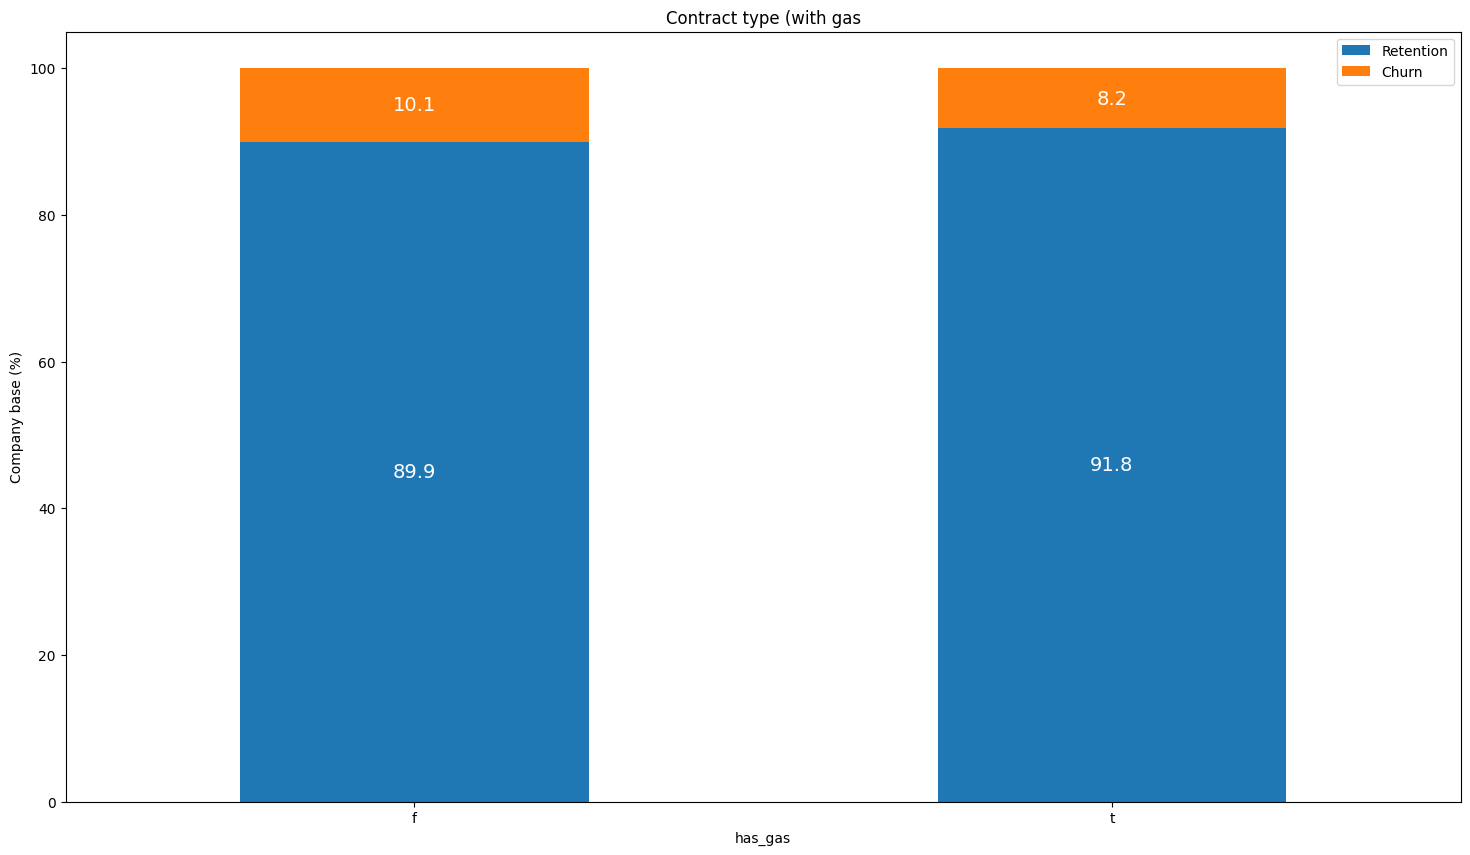

In [71]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

In [72]:
# Plotting plots for numeric columns that relates to margins

In [73]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

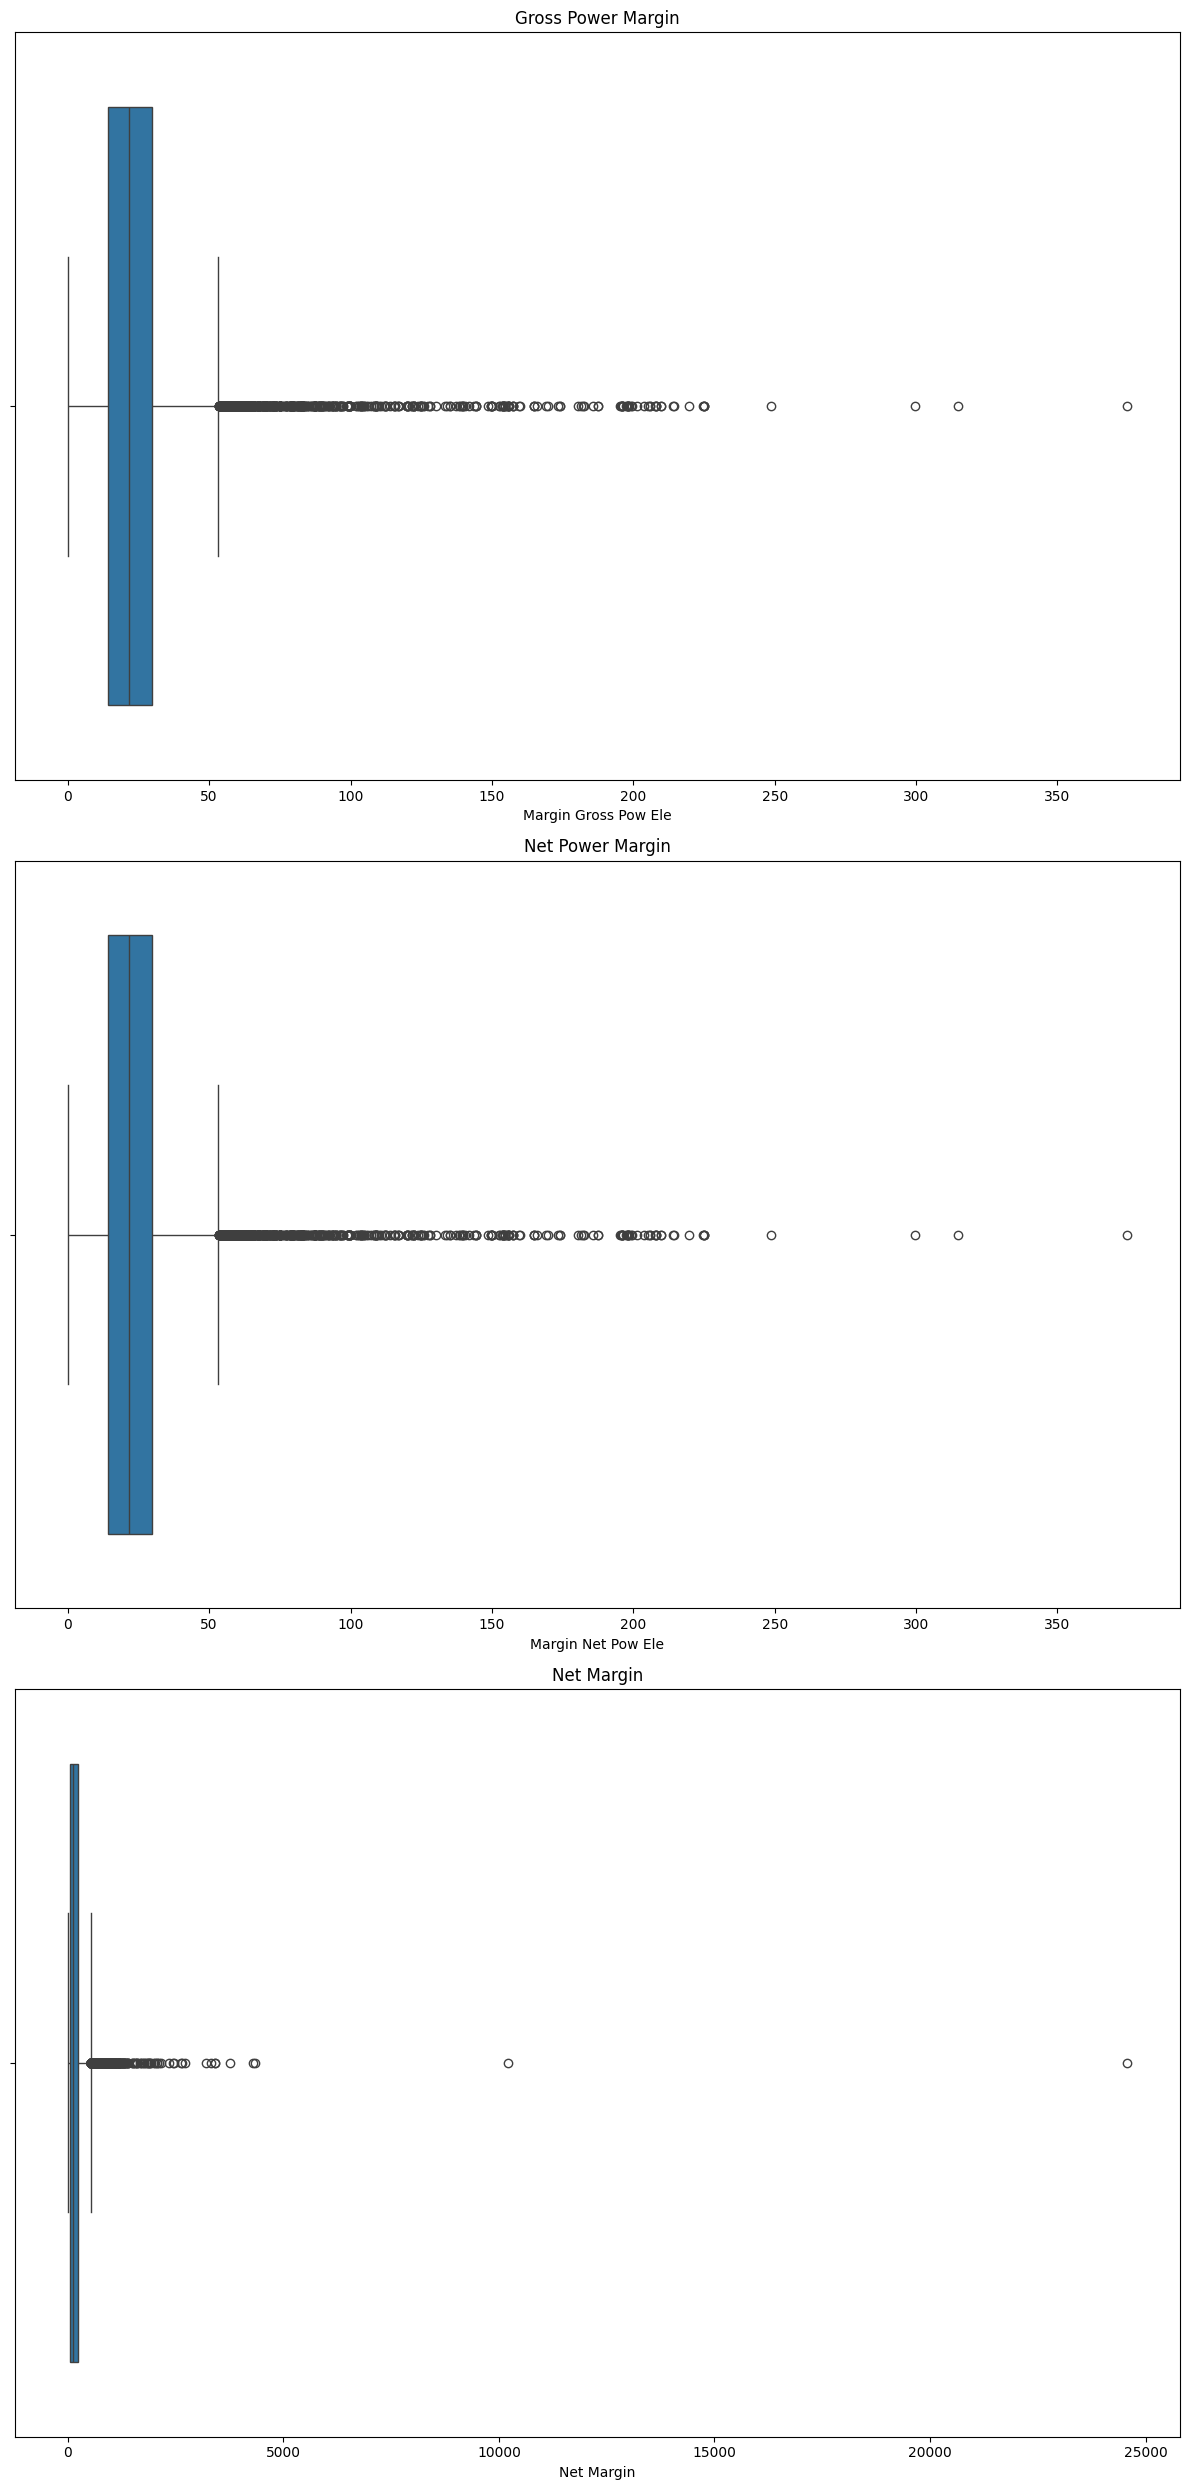

In [74]:
# Create subplots
fig, axs = plt.subplots(nrows=3, figsize=(12, 25))

# List of columns to plot and their titles
columns = ["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]
titles = ["Gross Power Margin", "Net Power Margin", "Net Margin"]

# Plot each boxplot
for ax, column, title in zip(axs, columns, titles):
    sns.boxplot(x=margin[column], ax=ax, orient='h')
    ax.set_title(title)
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.ticklabel_format(style='plain', axis='x')
    ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [75]:
# Plotting plots for columns that relates to products

In [76]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

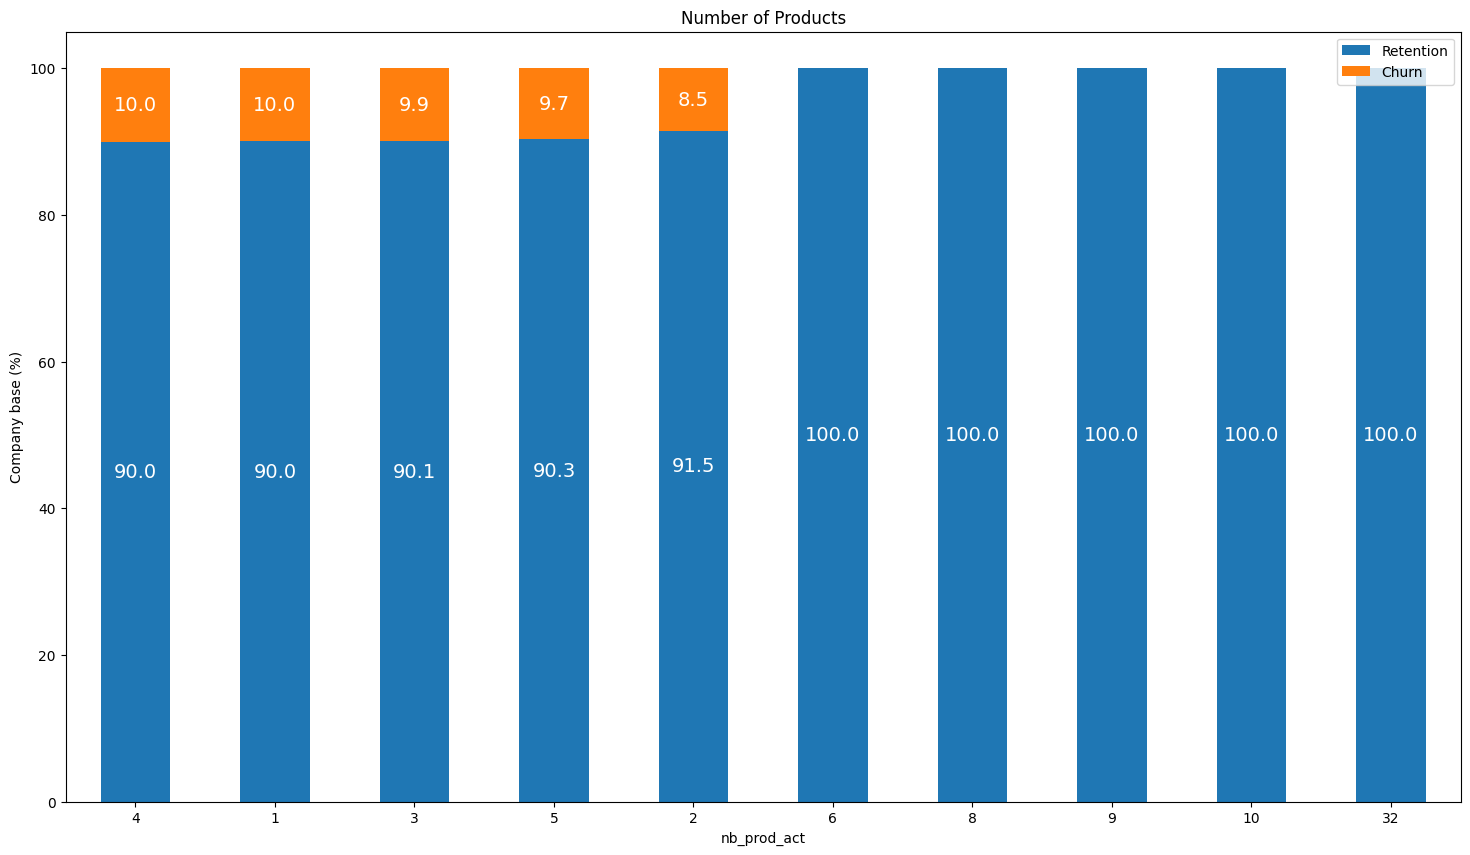

In [77]:
plot_stacked_bars(products_percentage, "Number of Products")

In [78]:
# Plotting plots for numeric columns that relates to customer's antiquity

In [79]:
antiq = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
antiq_percentage = (antiq.div(antiq.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

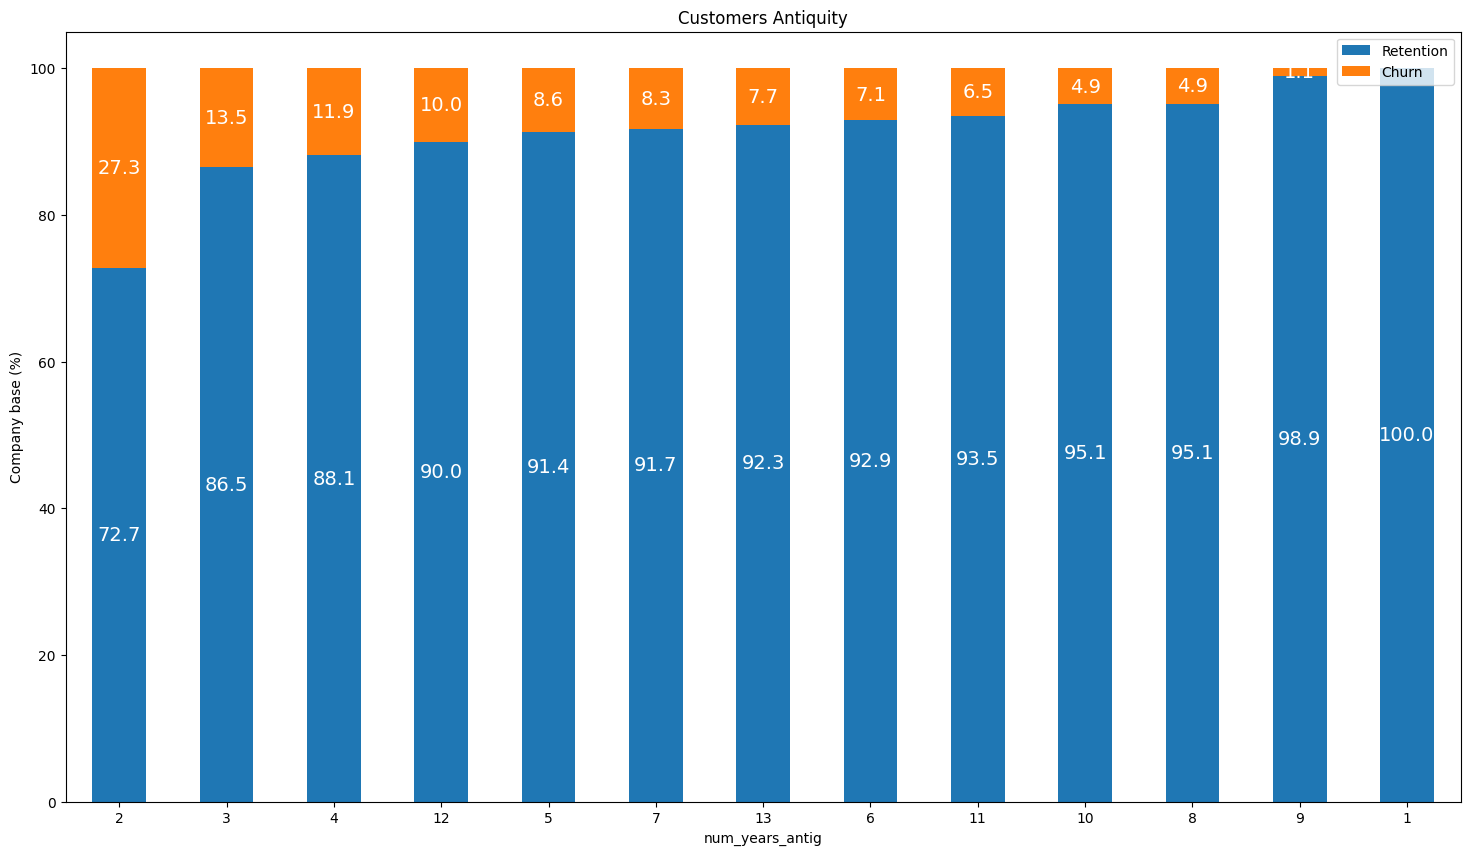

In [80]:
plot_stacked_bars(antiq_percentage, "Customers Antiquity")

In [81]:
# Plotting plots for numeric columns that relates to electricity campaign

In [82]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

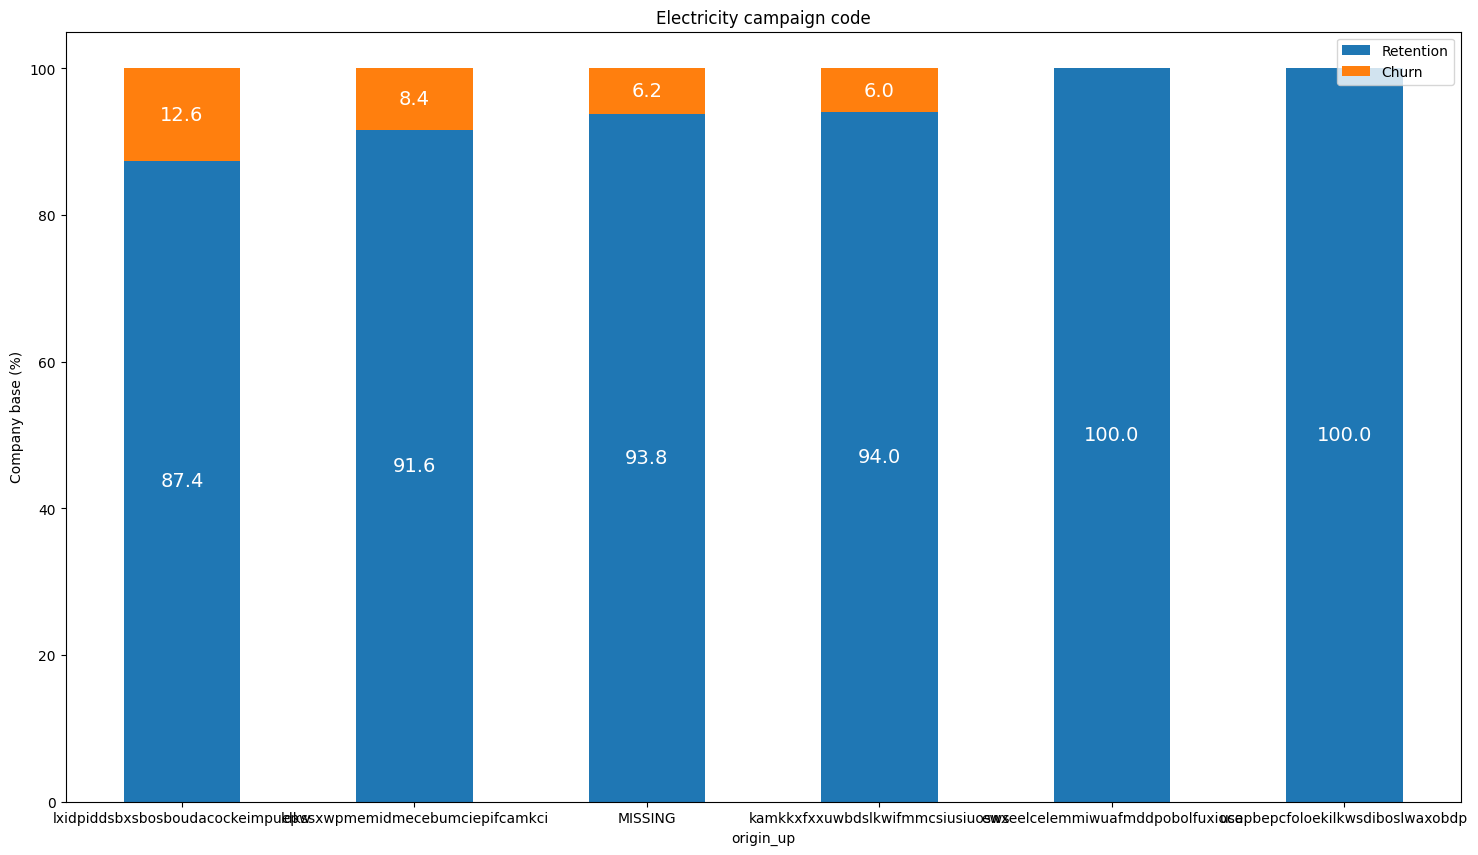

In [83]:
plot_stacked_bars(origin_percentage, "Electricity campaign code")

In [86]:
# Showing the distribution of dates in price_df

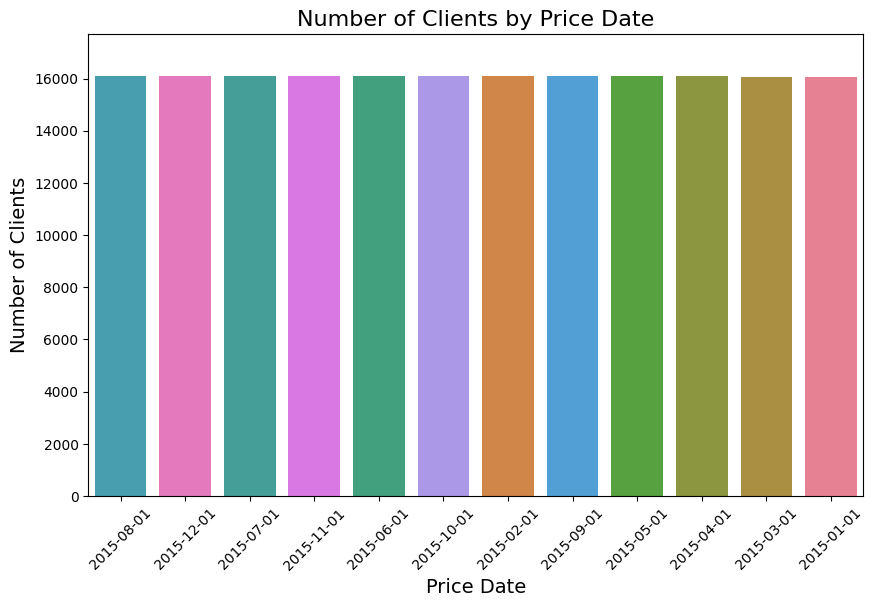

In [88]:
# Count the occurrences of each datedays_counts = price_df['price_date'].value_counts()

days_counts = price_df['price_date'].value_counts()

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=price_df, x='price_date', hue='price_date', legend=False, order=days_counts.index)

# Set plot title and labels
plt.title('Number of Clients by Price Date', fontsize=16)
plt.xlabel('Price Date', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)

# Adjust y-axis limit
plt.ylim(0, days_counts.max() * 1.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
